In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
# Importing the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
data = pd.DataFrame(boston.data)

In [ ]:
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#Setting price as the target variable
data['PRICE'] = boston.target

In [ ]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [ ]:
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
#Normalising
sc = StandardScaler()
sc.fit_transform(X_test)
sc.fit_transform(X_train)

array([[ 1.28770177, -0.50032012,  1.03323679, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-0.38135592, -0.50032012, -0.35216694, ...,  1.15981657,
        -3.12158061, -0.25731635]])

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Lr model prediction on trained data
y_pred_lr = lr.predict(X_test)

In [ ]:
#Using polynomial regression
poly = PolynomialFeatures(degree=2)

In [ ]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [ ]:
lr.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred_poly = lr.predict(X_test_poly)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [ ]:
# Train using RandomForestRegressor
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred_rfr = rfr.predict(X_test)

In [ ]:
#Using gridsearch for hyper-parameter tuning, rfr
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Setting multiple values for rfr parameters
random_grid = {'n_estimators': [10,100,200, 400, 600], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None],
            'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}

In [ ]:
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
#Fitting training data into randomisedsearchcv
rfr_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 100, 200, 400,
                                                         600]},
                   random_state=42, verbose=2)

In [ ]:
#Getting best rfr parameters
rfr_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [ ]:
#Updating rfr with best_params values
rfr_rand = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
#Fitting training data with rfr's best_params
rfr_rand.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt',
                      n_estimators=400)

In [ ]:
y_pred_rfr_rand = rfr_rand.predict(X_test)

In [ ]:
#Now with XGBoost
from xgboost import XGBRegressor
xgbr = XGBRegressor()

In [ ]:
# Train the model with default xgb params
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
# Model prediction on train data
y_pred_xgb = xgbr.predict(X_test)

In [ ]:
#Setting multiple values for xgb parameters
params={
 "learning_rate"    : [0.001, 0.01, 0.05, 0.1, 0.2, 0.3] ,
 "max_depth"        : [4, 5, 6, 8, 10, 12],
 "min_child_weight" : [1, 3, 5],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3],
 "colsample_bytree" : [ 0.3, 0.4, 0.5, 1]

}

In [ ]:
xgb_random7 = RandomizedSearchCV(estimator = xgbr, param_distributions= params, n_iter=100, cv=3, verbose=2, n_jobs=-1)

In [ ]:
#Fitting training data into randomisedsearchcv
xgb_random7.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=4,
                                          num_par...ree=1, random_state=0,
                                          reg_alpha=0, reg_lambda=1,
                                          scale_pos_weig

In [ ]:
xgb_random7.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.3,
 'gamma': 0.2,
 'colsample_bytree': 1}

In [ ]:
#Updating xgbr with best_params values
xgbr_rand7 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=10,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
xgbr_rand7.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_pred_xgbr_rand7 = xgbr_rand7.predict(X_test)

In [ ]:
#R2 scores of all regression models:
print("Linear Regression: ", r2_score(y_test, y_pred_lr))
print("Polynomial Regression: ", r2_score(y_test, y_pred_poly))
print("Random Forest: ", r2_score(y_test, y_pred_rfr))
print("Random Forest through gridsearch: ", r2_score(y_test, y_pred_rfr_rand))
print("default xgb params : ", r2_score(y_test, y_pred_xgb))
print("XGBoost through gridsearch: ", r2_score(y_test, y_pred_xgbr_rand7))

Linear Regression:  0.6687594935356294
Polynomial Regression:  0.8065890290726113
Random Forest:  0.8860258262571211
Random Forest through gridsearch:  0.8778387543689249
default xgb params :  0.9105388132305845
XGBoost through gridsearch:  0.8891994087782685


In [ ]:
#now SVM
from sklearn import svm

In [ ]:
reg = svm.SVR(C=1000000, cache_size=200, coef0=0.0, degree=4, epsilon=0.1,
  gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
reg.fit(X_train, y_train)

SVR(C=1000000, degree=4)

In [ ]:
y_pred_reg = reg.predict(X_test)

In [ ]:
reg2 = svm.SVR(C=100000, cache_size=200, coef0=0.0, degree=4, epsilon=0.1,
  gamma='scale', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
reg2.fit(X_train, y_train)

SVR(C=100000, degree=4, kernel='poly')

In [ ]:
y_pred_reg2 = reg2.predict(X_test)

In [ ]:
print("SVM with 'rbf' kernel: ", r2_score(y_test, y_pred_reg))
print("SVM with 'poly' kernel: ", r2_score(y_test, y_pred_reg2))

SVM with 'rbf' kernel:  0.821646734651796
SVM with 'poly' kernel:  0.8300400843023377


In [ ]:
m_lr, b_lr = np.polyfit(y_test, y_pred_lr, 1)
print(m_lr, b_lr)

m_pol, b_pol = np.polyfit(y_test, y_pred_poly, 1)
print(m_pol, b_pol)

m_rfr, b_rfr = np.polyfit(y_test, y_pred_rfr, 1)
print(m_rfr, b_rfr)

m_rfrand, b_rfrand = np.polyfit(y_test, y_pred_rfr_rand, 1)
print(m_rfrand, b_rfrand)

m_xgbr, b_xgbr = np.polyfit(y_test, y_pred_xgb, 1)
print(m_xgbr, b_xgbr)

m_xgbrand, b_xgbrand = np.polyfit(y_test, y_pred_xgbr_rand7, 1)
print(m_xgbrand, b_xgbrand)

m_svreg1, b_svreg1 = np.polyfit(y_test, y_pred_reg, 1)
print(m_svreg1, b_svreg1)

m_svreg2, b_svreg2 = np.polyfit(y_test, y_pred_reg2, 1)
print(m_svreg2, b_svreg2)

0.786439953200314 4.353202349704965
0.872728088449711 2.754347877473201
0.8519959581877371 3.026492733765865
0.8022020405862428 4.003365078094408
0.8700243202511652 2.5435404890441133
0.8672578999673743 2.4022467355733443
0.8491778098390922 2.6254717867937356
0.78727468630717 4.24605362934802


In [ ]:
lr_equation = (0.78644*(y_test) + 4.35320)
poly_equation = (0.8727*(y_test) + 2.75434)
rfr_equation = (0.8472*(y_test) + 3.09114)
rfr_rand_equation = (0.8017*(y_test) + 3.97627)
xgbr_equation = (0.8700*(y_test) + 2.54354)
xgbr_rand_equation = (0.8672*(y_test) + 2.40224)
svm_rbf_equation = (0.8491*(y_test) + 2.62547)
svm_poly_equation = (0.78727*(y_test) + 4.24605)

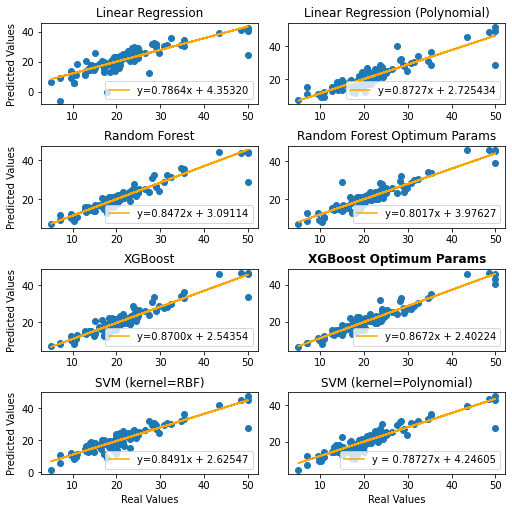

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(7,7), constrained_layout=True)
axs[0, 0].scatter(y_test, y_pred_lr)
axs[0, 0].plot(y_test, lr_equation, label= 'y=0.7864x + 4.35320', color='orange')
axs[0, 0].legend(loc='lower right')
axs[0, 0].set_title("Linear Regression")
axs[0, 1].scatter(y_test, y_pred_poly)
axs[0, 1].plot(y_test, poly_equation, label = 'y=0.8727x + 2.725434', color='orange')
axs[0, 1].set_title("Linear Regression (Polynomial)")
axs[0, 1].legend(loc='lower right')
axs[1, 0].scatter(y_test, y_pred_rfr_rand)
axs[1, 0].plot(y_test, rfr_equation, label = 'y=0.8472x + 3.09114', color='orange')
axs[1, 0].set_title("Random Forest")
axs[1, 0].legend(loc='lower right')
axs[1, 1].scatter(y_test, y_pred_rfr)
axs[1, 1].plot(y_test, rfr_rand_equation,  label= 'y=0.8017x + 3.97627', color='orange')
axs[1, 1].set_title("Random Forest Optimum Params")
axs[1, 1].legend(loc='lower right')
axs[2, 0].scatter(y_test, y_pred_xgbr_rand7)
axs[2, 0].plot(y_test, xgbr_rand_equation, label = 'y=0.8700x + 2.54354', color='orange')
axs[2, 0].set_title("XGBoost")
axs[2, 0].legend(loc='lower right')
axs[2, 1].scatter(y_test, y_pred_xgb)
axs[2, 1].plot(y_test, xgbr_equation, label = 'y=0.8672x + 2.40224', color='orange')
axs[2, 1].set_title("XGBoost Optimum Params", weight='bold')
axs[2, 1].legend(loc='lower right')
axs[3, 0].scatter(y_test, y_pred_reg)
axs[3, 0].plot(y_test, svm_rbf_equation, label = 'y=0.8491x + 2.62547', color='orange')
axs[3, 0].set_title("SVM (kernel=RBF)")
axs[3, 0].legend(loc='lower right')
axs[3, 1].scatter(y_test, y_pred_reg2)
axs[3, 1].plot(y_test, svm_poly_equation, label= 'y = 0.78727x + 4.24605', color='orange')
axs[3, 1].set_title("SVM (kernel=Polynomial)")
axs[3, 1].legend(loc='lower right')

# set labels
plt.setp(axs[-1, :], xlabel='Real Values')
plt.setp(axs[:, 0], ylabel='Predicted Values')

plt.show()

In [ ]:
from sklearn.metrics import explained_variance_score

In [ ]:
#R2 scores of all regression models:
print("Linear Regression: ", explained_variance_score(y_test, y_pred_lr))
print("Polynomial Regression: ", explained_variance_score(y_test, y_pred_poly))
print("Random Forest: ", explained_variance_score(y_test, y_pred_rfr))
print("Random Forest through gridsearch: ", explained_variance_score(y_test, y_pred_rfr_rand))
print("default xgb params : ", explained_variance_score(y_test, y_pred_xgb))
print("XGBoost through gridsearch: ", explained_variance_score(y_test, y_pred_xgbr_rand7))

Linear Regression:  0.6695178614705675
Polynomial Regression:  0.8065942137871948
Random Forest:  0.8854924162505137
Random Forest through gridsearch:  0.8711581919006175
default xgb params :  0.9113870457685982
XGBoost through gridsearch:  0.8919625567003844


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
#MAPE scores of all regression models:
print("Linear Regression: ", mean_absolute_percentage_error(y_test, y_pred_lr))
print("Polynomial Regression: ", mean_absolute_percentage_error(y_test, y_pred_poly))
print("Random Forest: ", mean_absolute_percentage_error(y_test, y_pred_rfr))
print("Random Forest through gridsearch: ", mean_absolute_percentage_error(y_test, y_pred_rfr_rand))
print("default xgb params : ", mean_absolute_percentage_error(y_test, y_pred_xgb))
print("XGBoost through gridsearch: ", mean_absolute_percentage_error(y_test, y_pred_xgbr_rand7))

Linear Regression:  0.16866394539378823
Polynomial Regression:  0.13844411091871678
Random Forest:  0.11242540903280611
Random Forest through gridsearch:  0.09754291693090991
default xgb params :  0.09681689630767087
XGBoost through gridsearch:  0.10374446985073657


In [ ]:
print("SVM with 'rbf' kernel: ", mean_absolute_percentage_error(y_test, y_pred_reg))
print("SVM with 'poly' kernel: ", mean_absolute_percentage_error(y_test, y_pred_reg2))

SVM with 'rbf' kernel:  0.12425788918802982
SVM with 'poly' kernel:  0.11400033757024823


In [ ]:
#Doing shap value analysis for explainability
import shap

In [ ]:
#Creating tree explainer
explainer = shap.TreeExplainer(xgbr)
shap_values = explainer(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


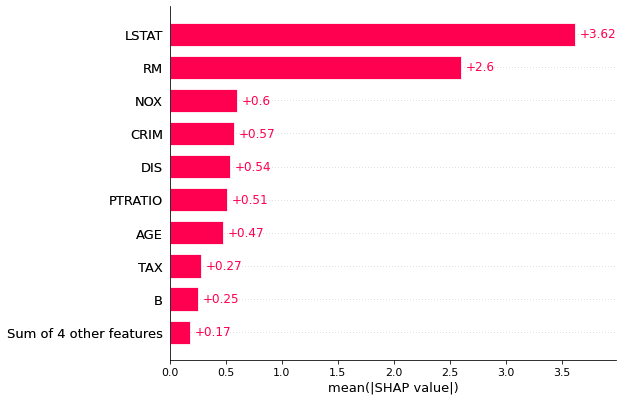

In [ ]:
shap.plots.bar(shap_values, max_display=10)